In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from numpy import linalg as LA
from scipy.linalg import hilbert
from scipy.linalg import lu
from scipy import linalg as LA

### Erste Programmieraufgabe:


In [2]:
def regularfalsi(f,a,b,tol):
    x = np.zeros(1, dtype=float)
    abbruch = True
    i = 0
    x[i]= a-(f(a)*(b-a)/(f(b)-f(a)))
    while abbruch == True:
        if x[i] > 0:
            b = x[i]
        if x[i] < 0:
            a = x[i]
        elif x[i] == 0:
            print("Das regular Falsi Verfahren kann bei der Eingabe nicht angewandt werden.")
        i += 1
        x = np.append(x,(a*f(b)-b*f(a))/(f(b)-f(a)))
        
        if np.abs(x[i-1]-x[i])<tol:
            abbruch = False 
    n = np.shape(x)
    return x[n[0]-1]

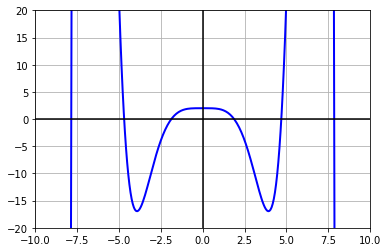

Aus dem Plot der Funktion wurde x1 = 1 und x2 = 3 als Startwerte gewählt.
Bei den gewählten Parametern ist eine Nullstelle zu x = 1.87510406871 angenährt.


In [3]:
# Funktion definieren
def f(x):
    y = 1+(np.cos(x)*np.cosh(x))
    return y

# Funktionsplott der Funktion f(x) = 1 + cos(x)*cosh(x)
x = np.linspace(-10,10,300)
plt.plot(x, 1+(np.cos(x)*np.cosh(x)), color = 'blue', linewidth=2)
plt.xlim(-10, 10)
plt.ylim(-20, 20)
plt.grid()
plt.axvline(x=0, color='black', linestyle='-')
plt.axhline(y=0, color='black', linestyle='-')
plt.show()



# Regular Falsi Funktion aufrufen
print("Aus dem Plot der Funktion wurde x1 = 1 und x2 = 3 als Startwerte gewählt.")
x = regularfalsi(f,1,3,1*10e-12) #um die 10te Stelle richtig zu haben muss die Toleranz größer als 10e-10 gewählt werden
print("Bei den gewählten Parametern ist eine Nullstelle zu x =",'%.11f'%x, "angenährt.")


# Auf 10 Stellen genau wäre:
# 1.8751040687 062754

### Einschub (Theorieaufgabe 3c)

In [4]:
tol = 10e-15

# Iterationsverfahren (**)
x = np.zeros(1, dtype=np.double)
i = 0
a = 5
b = True
x[0] = 5


while b == True:
    x = np.append(x,0.5*(x[i]+(a)/(x[i]))-((x[i])**2-a)**2/(8*x[i]**3))
    if np.abs(np.sqrt(5)-x[i+1])<tol:
        b = False
    i += 1
n = np.shape(x)

print("Iterationsverfahren:")
for h in range(1,n[0]):
    print("Nach dem",h, "Iterationsschritt ist x=",'%.16f'%x[h])
print("Für das Ergebnis mit Iterationsverfahren braucht man",n[0]-1,"Durchläufe.\n\n")

# Newtonverfahren (*)
y = np.zeros(1, dtype=np.double)
y[0] = 5
i = 0
a = 5
c = True

while c == True: 
    y = np.append(y,(0.5*(y[i]+(a)/(y[i]))))
    if np.abs(y[i+1]-np.sqrt(5))<tol:
        c = False
    i += 1
n = np.shape(y)

print("Newtonverfahren:")
for h in range(1,n[0]):
    print("Nach dem",h, "Iterationsschritt ist x=",'%.16f'%y[h])
print("Für das Ergebnis mit Newtonverfahren braucht man",n[0]-1,"Durchläufe.")

# Erwartetes Ergebnis:
# 2.2360679774 9978969640

Iterationsverfahren:
Nach dem 1 Iterationsschritt ist x= 2.6000000000000001
Nach dem 2 Iterationsschritt ist x= 2.2395084205735092
Nach dem 3 Iterationsschritt ist x= 2.2360679815580595
Nach dem 4 Iterationsschritt ist x= 2.2360679774997898
Für das Ergebnis mit Iterationsverfahren braucht man 4 Durchläufe.


Newtonverfahren:
Nach dem 1 Iterationsschritt ist x= 3.0000000000000000
Nach dem 2 Iterationsschritt ist x= 2.3333333333333335
Nach dem 3 Iterationsschritt ist x= 2.2380952380952381
Nach dem 4 Iterationsschritt ist x= 2.2360688956433634
Nach dem 5 Iterationsschritt ist x= 2.2360679774999781
Nach dem 6 Iterationsschritt ist x= 2.2360679774997898
Für das Ergebnis mit Newtonverfahren braucht man 6 Durchläufe.


### Zweite Programmieraufgabe:

In [5]:
# Funktion
def F(x):
    a = np.array([[0,0],[1,1]], dtype=float)
    s = 10
    l = 2
    m = 1
    F = np.zeros((2,2), dtype=np.double)
    
    for k in range(2):
        F[k] = s*(((l)/(LA.norm(x-a[k],2)))-1)*(x-a[k])
    return F

# Ableitung
def f(x):
    a = np.array([[0,0],[1,1]], dtype=float)
    s = 10
    l = 2
    m = 1
    I = np.identity(2)
    f = np.zeros((2,2,2), dtype=float)

    for k in range(2):
        xa = np.array([x-a[k]])
        xa = np.append(xa, [np.zeros(2)], axis=0)
        f[k] = (s*(((l/(LA.norm(x-a[k],2)))-1)*I-(l*(np.transpose(xa)@xa)/((LA.norm(x-a[k],2))**3))))
    return f

def Fgesamt(x):
    F12 = F(x)
    F1 = F12[0]
    F2 = F12[1]
    G = np.array([0,-9.81])
    Fgesamt = F1+F2+G
    return Fgesamt
    
def fgesamt(x):
    f12 = f(x)
    f1 = f12[0]
    f2 = f12[1]
    fgesamt = f1+f2
    return fgesamt

def newtonverfahren(x0):
    x = np.zeros((1,2), dtype=np.double)
    x[0] = x0
    tol = 10e-10
    i = 0
    c = True
    while c == True: 
        x = np.append(x,[x[i]-LA.inv(fgesamt(x[i]))@Fgesamt(x[i])], axis= 0)        
        if (np.abs(x[i+1,0]-x[i,0]))<tol and (np.abs(x[i+1,1]-x[i,1]))<tol:
            c = False
        i += 1
    n = np.shape(x)
    print
    return x[n[0]-1]


In [6]:
x01 = np.array([0,-4])
new1= newtonverfahren(x01)
print("Die erste angenäherte Nullstelle ist bei: x=",new1,"und F(x)=",Fgesamt(new1))



x02 = np.array([0,4])
new2 = newtonverfahren(x02)
print("Die zweite angenäherte Nullstelle ist bei x=",new2,"und F(x)=",Fgesamt(new2))


print("\nDas Sytem ist in mehreren unterschiedlichen Punkten im Raum in Ruhe. Durch die verschiedenen Startpunkte haben wir uns an unterschiedliche Gleichgewichtspunkten im Raum angenährt.")

Die erste angenäherte Nullstelle ist bei: x= [ 0.87769914 -1.89719206] und F(x)= [2.22044605e-16 0.00000000e+00]
Die zweite angenäherte Nullstelle ist bei x= [1.06051569 1.87787206] und F(x)= [-8.8817842e-16  0.0000000e+00]

Das Sytem ist in mehreren unterschiedlichen Punkten im Raum in Ruhe. Durch die verschiedenen Startpunkte haben wir uns an unterschiedliche Gleichgewichtspunkten im Raum angenährt.
